## 1.关联数据集处理
针对Wine Reviews数据集，我们应用Apriori算法来挖掘其中数据项之间的关系

In [26]:
#encoding='utf-8'
import os
import sys
import math
import pandas as pd
import numpy as np
import csv
import json
import pickle
import matplotlib.pyplot as plt
from akapriori import apriori
%matplotlib inline

In [27]:
wine1 = pd.read_csv('./winemag-data-130k-v2.csv', encoding="utf-8")
wine1 = wine1.dropna()

In [28]:
wine1.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


In [114]:
regions = list(dict(wine1.region_1.value_counts()).keys())
tasters = list(dict(wine1.taster_twitter_handle.value_counts()).keys())
points = list(dict(wine1.points.value_counts()).keys())
winery = list(dict(wine1.winery.value_counts()).keys())
variety = list(dict(wine1.variety.value_counts()).keys())
variety = list(dict(wine1.variety.value_counts()).keys())

In [127]:
len(tasters),  len(variety)

(11, 183)

In [128]:
variety[0:10]

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Syrah',
 'Zinfandel',
 'Bordeaux-style Red Blend',
 'Merlot',
 'Sauvignon Blanc',
 'Rhône-style Red Blend']

In [129]:
contains = {i: [0] * len(tasters) for i in variety}
for row in wine1.iterrows():
    variety = row[1]['variety']
    taster = row[1]['taster_twitter_handle']
    contains[variety][tasters.index(taster)] = 1
    
with open('new_data.csv', 'w', encoding='utf-8') as f:
    f_csv = csv.writer(f, delimiter=',')
    f_csv.writerow(['variety'] + tasters)
    for key in contains.keys():
        f_csv.writerow([key] + contains[key])

In [131]:
data = pd.read_csv('./new_data.csv')
data.head(10)

,variety,@vboone,@paulgwine,@mattkettmann,@wawinereport,@gordone_cellars,@suskostrzewa,@JoeCz,@wineschach,@laurbuzz,@vossroger,@winewchristina
0,Pinot Noir,1,1,1,1,1,0,1,1,0,1,0
1,Chardonnay,1,1,1,1,1,1,1,1,1,0,0
2,Cabernet Sauvignon,1,1,1,1,1,1,1,1,0,0,0
3,Red Blend,1,1,1,1,1,1,1,1,0,0,0
4,Syrah,1,1,1,1,1,0,0,0,0,0,0
5,Zinfandel,1,1,1,1,1,0,0,0,0,0,0
6,Bordeaux-style Red Blend,1,1,1,1,1,1,1,1,0,0,0
7,Merlot,1,1,1,1,1,1,1,0,0,0,0
8,Sauvignon Blanc,1,1,1,1,1,1,0,0,0,0,0
9,Rhône-style Red Blend,1,1,1,1,1,0,0,0,0,0,0


## 2.使用 Apriori 算法,寻找频繁项集
* 通过设置最小支持度来降低计算复杂度

In [132]:
new_data = [[tasters[idx] for idx, i in enumerate(value) if i == 1] for key, value in contains.items()]

In [133]:
rules = apriori(new_data, support=0.02, confidence=0.1, lift=2)
rules_sorted = sorted(rules, key=lambda x: (x[4], x[3], x[2]), reverse=True) # ORDER BY lift DESC, confidence DESC, support DESC

print(f"频繁项集, min support: {0.01}")
for r in rules_sorted:
    print(list(r[0]) + list(r[1]), r[2])

频繁项集, min support: 0.01
['@suskostrzewa', '@JoeCz'] 0.060109289617486336
['@JoeCz', '@suskostrzewa'] 0.060109289617486336
['@wineschach', '@JoeCz'] 0.03825136612021858
['@JoeCz', '@wineschach'] 0.03825136612021858
['@suskostrzewa', '@wineschach'] 0.03825136612021858
['@wineschach', '@suskostrzewa'] 0.03825136612021858
['@wineschach', '@gordone_cellars'] 0.060109289617486336
['@gordone_cellars', '@wineschach'] 0.060109289617486336
['@wineschach', '@wawinereport'] 0.0546448087431694
['@wawinereport', '@wineschach'] 0.0546448087431694


## 3.导出关联规则及其支持度，Support，Lift，Apriori
结果保存再 result.csv 中

In [134]:
rules = apriori(new_data, support=0.02, confidence=0.1, lift=2)
rules_sorted = sorted(rules, key=lambda x: (x[4], x[3], x[2]), reverse=True) # ORDER BY lift DESC, confidence DESC, support DESC

print(f"频繁项集, sup: {0.01}, confidence: {0.1}, lift: {2}")
with open('result.csv', 'w') as f:
    f_csv = csv.writer(f, delimiter=',')
    f_csv.writerow(['rule', 'sup', 'conf', 'lift'])
    for r in rules_sorted:
        f_csv.writerow([f'{str(list(r[0])[0])} => {str(list(r[1])[0])}', r[2], r[3], r[4]])

频繁项集, sup: 0.01, confidence: 0.1, lift: 2


In [135]:
result = pd.read_csv('./result.csv')
result.head(10)

,rule,sup,conf,lift
0,@suskostrzewa => @JoeCz,0.060109,0.647059,7.894118
1,@JoeCz => @suskostrzewa,0.060109,0.733333,7.894118
2,@wineschach => @JoeCz,0.038251,0.636364,7.763636
3,@JoeCz => @wineschach,0.038251,0.466667,7.763636
4,@suskostrzewa => @wineschach,0.038251,0.411765,6.850267
5,@wineschach => @suskostrzewa,0.038251,0.636364,6.850267
6,@wineschach => @gordone_cellars,0.060109,1.000000,2.287500
7,@gordone_cellars => @wineschach,0.060109,0.137500,2.287500
8,@wineschach => @wawinereport,0.054645,0.909091,2.079545
9,@wawinereport => @wineschach,0.054645,0.125000,2.079545


## 4.挖掘结果展示

针对规则 @suskostrzewa => @JoeCz 举例, LIFT 是 7.89 该值远远大于 1 说明这两个 item 存在正相关关系，分布具有一定的相似性
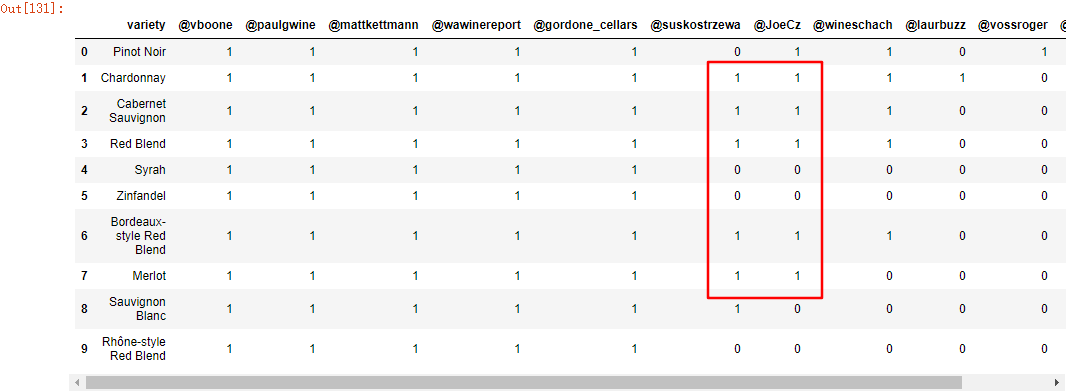
通过上表导出的相关性结果可以看出两者的确存在很大概率会品尝同一种类的红酒

## 5.挖掘结果分析报告

**本例针对 Wine Review 数据集进行关联数据挖掘，其中先定义一下事务和项集**
1. 事务: 本次关联规则分析首相将数据进行分类处理，按照红酒种类（variety）列举出品酒师的名字（taster），其中我们将品尝每个variety的所有品酒师作为一个事务。
2. 项集: 所有品酒师的集和

**结果分析:**
本里通过 Apriori 算法按照 support, confidence, lift 等指标计算出了频繁项集和他们之间的关系，挖掘出了品酒人对不同种类红酒的特别爱好